In [1]:
%pip install sklearn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/train.csv')

In [37]:
for i, col in enumerate(df.columns):
    try:
        df.loc[:, col] = df.loc[:, col].fillna(df[col].mean())
    except:
        print(col)

country


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            15000 non-null  float64
 2   Q2            15000 non-null  float64
 3   Q3            15000 non-null  float64
 4   Q4            15000 non-null  float64
 5   Q5            15000 non-null  float64
 6   Q6            15000 non-null  float64
 7   Q7            15000 non-null  float64
 8   Q8            15000 non-null  float64
 9   Q9            15000 non-null  float64
 10  Q10           15000 non-null  float64
 11  Q11           15000 non-null  float64
 12  Q12           15000 non-null  float64
 13  Q13           15000 non-null  float64
 14  Q14           15000 non-null  float64
 15  Q15           15000 non-null  float64
 16  Q16           15000 non-null  float64
 17  Q17           15000 non-null  float64
 18  Q18           15000 non-nu

In [39]:
target = df.loc[:, 'nerdiness']
df = df.drop(columns=['country', 'nerdiness'])

x_train, x_test, y_train, y_test = \
    train_test_split(df, target, test_size=0.3, shuffle=True, random_state=23)

In [40]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1000, eval_matric="logloss")
xgb_model = model.fit(x_train, y_train, early_stopping_rounds=100, 
                eval_set=[(x_test, y_test)])

y_pre = xgb_model.predict(x_test)
y_pred_probs = xgb_model.predict_proba(x_test)[:, 1]

[11:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "eval_matric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.63399
[1]	validation_0-logloss:0.60144
[2]	validation_0-logloss:0.58144
[3]	validation_0-logloss:0.56556
[4]	validation_0-logloss:0.55454
[5]	validation_0-logloss:0.54755
[6]	validation_0-logloss:0.54010
[7]	validation_0-logloss:0.53504
[8]	validation_0-logloss:0.53170
[9]	validation_0-logloss:0.52955
[10]	validation_0-logloss:0.52858
[11]	validation_0-logloss:0.52764
[12]	validation_0-logloss:0.52530
[13]	validation_0-logloss:0.52407
[14]	validation_0-logloss:0.52302
[15]	validation_0-logloss:0.52270
[16]	validation_0-logloss:0.52213
[17]	validat

c:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-logloss:0.51835
[28]	validation_0-logloss:0.51841
[29]	validation_0-logloss:0.51775
[30]	validation_0-logloss:0.51751
[31]	validation_0-logloss:0.51733
[32]	validation_0-logloss:0.51696
[33]	validation_0-logloss:0.51852
[34]	validation_0-logloss:0.51866
[35]	validation_0-logloss:0.51902
[36]	validation_0-logloss:0.51821
[37]	validation_0-logloss:0.51938
[38]	validation_0-logloss:0.51937
[39]	validation_0-logloss:0.51854
[40]	validation_0-logloss:0.51816
[41]	validation_0-logloss:0.51816
[42]	validation_0-logloss:0.51832
[43]	validation_0-logloss:0.51816
[44]	validation_0-logloss:0.51802
[45]	validation_0-logloss:0.51759
[46]	validation_0-logloss:0.51832
[47]	validation_0-logloss:0.51856
[48]	validation_0-logloss:0.51792
[49]	validation_0-logloss:0.51791
[50]	validation_0-logloss:0.51808
[51]	validation_0-logloss:0.51804
[52]	validation_0-logloss:0.51732
[53]	validation_0-logloss:0.51744
[54]	validation_0-logloss:0.51682
[55]	validation_0-logloss:0.51710
[56]	validatio

In [41]:
print(y_pre)
print(y_pred_probs.mean())

[1 0 1 ... 1 1 1]
0.55310124


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

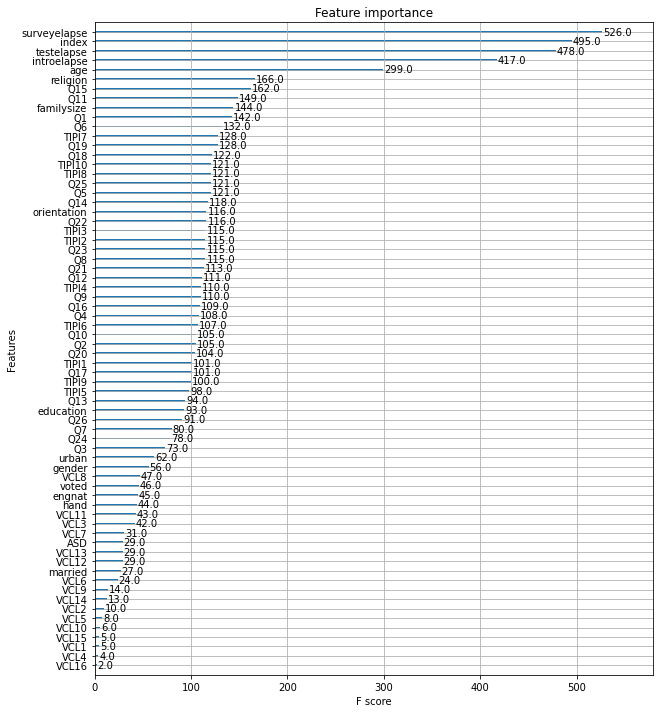

In [42]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

f, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [47]:
test_df = df.loc[:, ['surveyelapse', 'testelapse', 'introelapse', 'age',
                'religion']]

x_train, x_test, y_train, y_test = \
    train_test_split(test_df, target, test_size=0.2, random_state=23)

In [48]:
test_xgb_model = model.fit(x_train, y_train, early_stopping_rounds=100, 
                eval_set=[(x_test, y_test)])

test_pre = test_xgb_model.predict(x_test)
test_y_pred_probs = xgb_model.predict_proba(x_test)[:, 1]
print(test_pre)
print(test_y_pred_probs.mean())

[12:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "eval_matric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.68506
[1]	validation_0-logloss:0.67989
[2]	validation_0-logloss:0.67749
[3]	validation_0-logloss:0.67538
[4]	validation_0-logloss:0.67504
[5]	validation_0-logloss:0.67289
[6]	validation_0-logloss:0.67229
[7]	validation_0-logloss:0.67251
[8]	validation_0-logloss:0.67174
[9]	validation_0-logloss:0.67076
[10]	validation_0-logloss:0.67047
[11]	validation_0-logloss:0.66892
[12]	validation_0-logloss:0.66922
[13]	validation_0-logloss:0.66969
[14]	validation_0-logloss:0.67019
[15]	validation_0-logloss:0.67018
[16]	validation_0-logloss:0.67007
[17]	validat

c:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-logloss:0.67809
[81]	validation_0-logloss:0.67808
[82]	validation_0-logloss:0.67777
[83]	validation_0-logloss:0.67825
[84]	validation_0-logloss:0.67846
[85]	validation_0-logloss:0.67814
[86]	validation_0-logloss:0.67872
[87]	validation_0-logloss:0.67893
[88]	validation_0-logloss:0.67972
[89]	validation_0-logloss:0.67976
[90]	validation_0-logloss:0.67968
[91]	validation_0-logloss:0.67980
[92]	validation_0-logloss:0.67969
[93]	validation_0-logloss:0.67999
[94]	validation_0-logloss:0.68021
[95]	validation_0-logloss:0.68006
[96]	validation_0-logloss:0.67981
[97]	validation_0-logloss:0.68006
[98]	validation_0-logloss:0.67994
[99]	validation_0-logloss:0.67967
[100]	validation_0-logloss:0.67976
[101]	validation_0-logloss:0.68005
[102]	validation_0-logloss:0.68013
[103]	validation_0-logloss:0.68055
[104]	validation_0-logloss:0.68071
[105]	validation_0-logloss:0.68064
[106]	validation_0-logloss:0.68057
[107]	validation_0-logloss:0.68049
[108]	validation_0-logloss:0.68074
[109]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

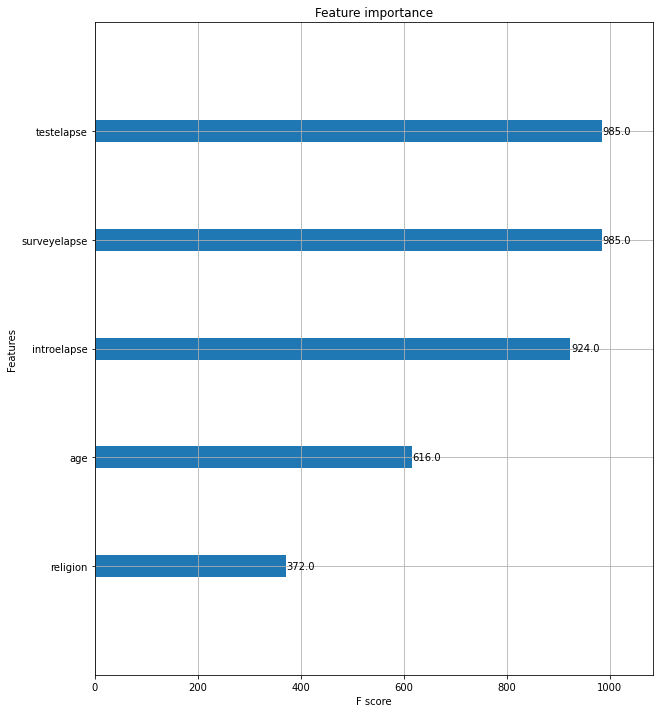

In [49]:
f, ax = plt.subplots(figsize=(10, 12))
plot_importance(test_xgb_model, ax=ax)

In [55]:
test_data = pd.read_csv('../data/test.csv')
test_data = test_data.loc[:, ['surveyelapse', 'testelapse', 'introelapse', 'age',
                'religion']]
submission = test_xgb_model.predict(test_data)
print(submission)

[1 1 1 ... 1 1 0]


In [67]:
submisson = pd.DataFrame(data=submission)
submisson.to_csv('./submission1.csv')